In [1]:
import mglearn

In [2]:
import pandas as pd
import numpy as np


In [3]:
X,y=mglearn.datasets.load_extended_boston()

In [5]:
X.shape

(506, 104)

In [7]:
y.shape

(506,)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression().fit(X_train,y_train)

In [16]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
print("testing score :",lr.score(X_test,y_test))
print("training score :",lr.score(X_train,y_train))

testing score : 0.6074721959665752
training score : 0.9520519609032729


here we can see that our training score is above 95% but at sametime testing score is 61% i.e. our model is overfitting to avoid this problem we will use ridge regression 


In [18]:
from sklearn.linear_model import Ridge

In [19]:
ridge=Ridge().fit(X_train,y_train)

In [20]:
print("ridge training score :",ridge.score(X_train,y_train))
print("ridge testing score :",ridge.score(X_test,y_test))

ridge training score : 0.885796658517094
ridge testing score : 0.7527683481744754


here alpha =1.0 , we can change the value of alpha which means we are setting our coefficients more towards zero, this will decrease the training score but help in avoid overfitting and hence testing score

In [26]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)

In [27]:
print("ridge(10) training score :",ridge.score(X_train,y_train))
print("ridge(10) testing score :",ridge.score(X_test,y_test))

ridge(10) training score : 0.9282273685001986
ridge(10) testing score : 0.7722067936479804


now setting alpha=0.1

In [30]:
ridge3=Ridge(alpha=0.1).fit(X_train,y_train)
print("ridge(0.1) training score :",ridge.score(X_train,y_train))
print("ridge(0.1) testing score :",ridge.score(X_test,y_test))

ridge(0.1) training score : 0.9282273685001986
ridge(0.1) testing score : 0.7722067936479804


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

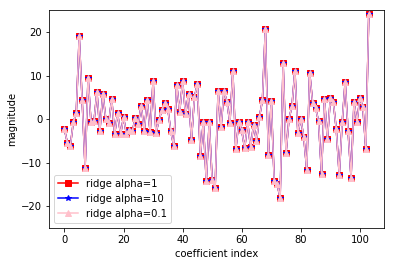

In [37]:
plt.plot(ridge.coef_,color="red",marker="s",label="ridge alpha=1")
plt.plot(ridge.coef_,color="blue",marker="*",label="ridge alpha=10")
plt.plot(ridge.coef_,color="pink",marker="^",label="ridge alpha=0.1")
plt.xlabel("coefficient index")
plt.ylabel("magnitude")
plt.ylim(-25,25)
plt.legend()

an alternative of ridge is lasso , in this coefficient can bcome zero unlike in ridge, so this can be said that the features which are not important in model builiding are eliminated by lasso so lasso is auotomatic feature selection

In [40]:
from sklearn.linear_model import Lasso

In [41]:
lasso=Lasso().fit(X_train,y_train)

In [42]:
print("training score :",lasso.score(X_train,y_train))
print("testing score :",lasso.score(X_test,y_test))

training score : 0.29323768991114607
testing score : 0.20937503255272294


here we can see that training and testing score is too  less which means underfitting , to avoid this underfitting we will use alpha as low as possible i.e. now our model is now try to fit to data as more as possible 

In [45]:
lasso=Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)

In [46]:
print("training score :",lasso.score(X_train,y_train))
print("testing score :",lasso.score(X_test,y_test))

training score : 0.9507158754515467
testing score : 0.6437467421272709


here we can see that training score is now increased as well as score of testing